In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [2]:
df=pd.read_csv("C:\\Users\\kalpana\\Downloads\\crime_data (1).csv")

In [3]:
df

,city name,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Murder'>

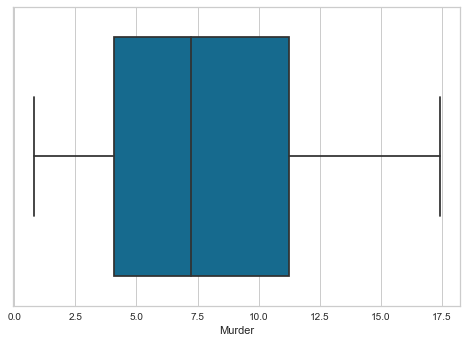

In [4]:
sns.boxplot(df.Murder)

C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Assault'>

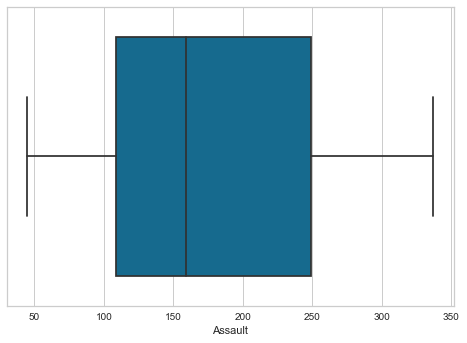

In [5]:
sns.boxplot(df.Assault)

C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UrbanPop'>

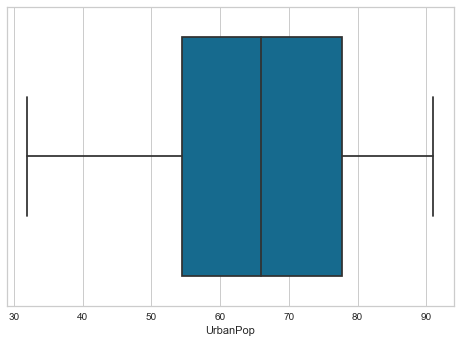

In [6]:
sns.boxplot(df.UrbanPop)

C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rape'>

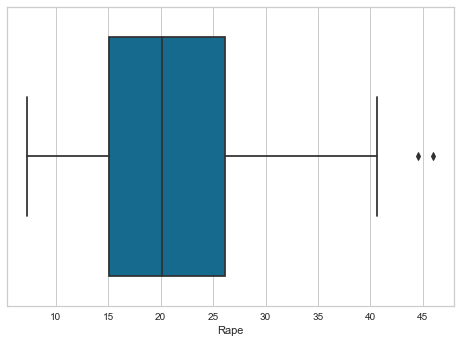

In [7]:
sns.boxplot(df.Rape)

In [8]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [9]:
df.drop(labels=['UrbanPop'],axis=1,inplace=True)

In [10]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.iloc[:,1:])

In [11]:
df1

array([[ 1.25517927,  0.79078716, -0.00345116],
       [ 0.51301858,  1.11805959,  2.50942392],
       [ 0.07236067,  1.49381682,  1.05346626],
       [ 0.23470832,  0.23321191, -0.18679398],
       [ 0.28109336,  1.2756352 ,  2.08881393],
       [ 0.02597562,  0.40290872,  1.88390137],
       [-1.04088037, -0.73648418, -1.09272319],
       [-0.43787481,  0.81502956, -0.58583422],
       [ 1.76541475,  1.99078607,  1.1505301 ],
       [ 2.22926518,  0.48775713,  0.49265293],
       [-0.57702994, -1.51224105, -0.11129987],
       [-1.20322802, -0.61527217, -0.75839217],
       [ 0.60578867,  0.94836277,  0.29852525],
       [-0.13637203, -0.70012057, -0.0250209 ],
       [-1.29599811, -1.39102904, -1.07115345],
       [-0.41468229, -0.67587817, -0.34856705],
       [ 0.44344101, -0.74860538, -0.53190987],
       [ 1.76541475,  0.94836277,  0.10439756],
       [-1.31919063, -1.06375661, -1.44862395],
       [ 0.81452136,  1.56654403,  0.70835037],
       [-0.78576263, -0.26375734, -0.531

In [12]:
df1 = pd.DataFrame(data=df1, columns = ['Murder','Assault','Rape'])
df1

,Murder,Assault,Rape
0,1.255179,0.790787,-0.003451
1,0.513019,1.118060,2.509424
2,0.072361,1.493817,1.053466
3,0.234708,0.233212,-0.186794
4,0.281093,1.275635,2.088814
5,0.025976,0.402909,1.883901
6,-1.040880,-0.736484,-1.092723
7,-0.437875,0.815030,-0.585834
8,1.765415,1.990786,1.150530
9,2.229265,0.487757,0.492653


In [13]:
df1.head()

,Murder,Assault,Rape
0,1.255179,0.790787,-0.003451
1,0.513019,1.118060,2.509424
2,0.072361,1.493817,1.053466
3,0.234708,0.233212,-0.186794
4,0.281093,1.275635,2.088814


In [14]:
df1.head()

,Murder,Assault,Rape
0,1.255179,0.790787,-0.003451
1,0.513019,1.118060,2.509424
2,0.072361,1.493817,1.053466
3,0.234708,0.233212,-0.186794
4,0.281093,1.275635,2.088814


In [15]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(df1)

KMeans(n_clusters=5, random_state=42)

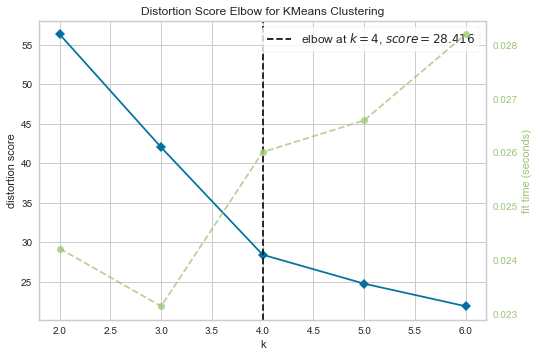

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(KMeans(),k=6)
visualizer.fit(df1)
visualizer.show()

In [17]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(df1)

KMeans(n_clusters=5, random_state=42)

In [18]:
clusters_new.labels_

array([4, 1, 2, 3, 1, 1, 0, 3, 2, 4, 3, 0, 2, 3, 0, 3, 3, 4, 0, 2, 3, 2,
       0, 4, 3, 3, 3, 1, 0, 3, 2, 2, 4, 0, 3, 3, 3, 3, 0, 4, 0, 4, 4, 3,
       0, 3, 3, 0, 0, 3])

In [19]:
#Assign clusters to the data set
df1['Kmeans'] = clusters_new.labels_

In [20]:
df1.head()

,Murder,Assault,Rape,Kmeans
0,1.255179,0.790787,-0.003451,4
1,0.513019,1.118060,2.509424,1
2,0.072361,1.493817,1.053466,2
3,0.234708,0.233212,-0.186794,3
4,0.281093,1.275635,2.088814,1


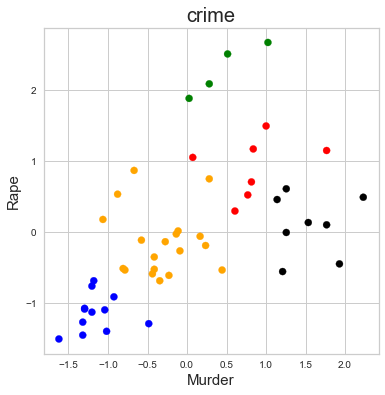

In [21]:
fig =plt.figure(figsize =(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Murder',fontsize=15)
ax.set_ylabel('Rape',fontsize=15)
ax.set_title('crime',fontsize=20)
color_theme =np.array(["blue","green","red","orange","black"])
ax.scatter(x=df1.Murder,y=df1.Rape,c=color_theme[df1.Kmeans],s=50)
plt.show()

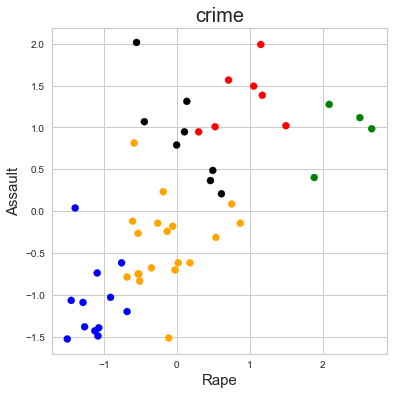

In [22]:
fig =plt.figure(figsize =(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Rape',fontsize=15)
ax.set_ylabel('Assault',fontsize=15)
ax.set_title('crime',fontsize=20)
color_theme =np.array(["blue","green","red","orange","black"])
ax.scatter(x=df1.Rape,y=df1.Assault,c=color_theme[df1.Kmeans],s=50)
plt.show()

<AxesSubplot:>

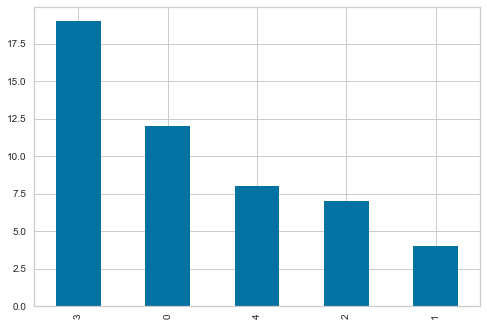

In [23]:
df1['Kmeans'].value_counts().plot.bar()

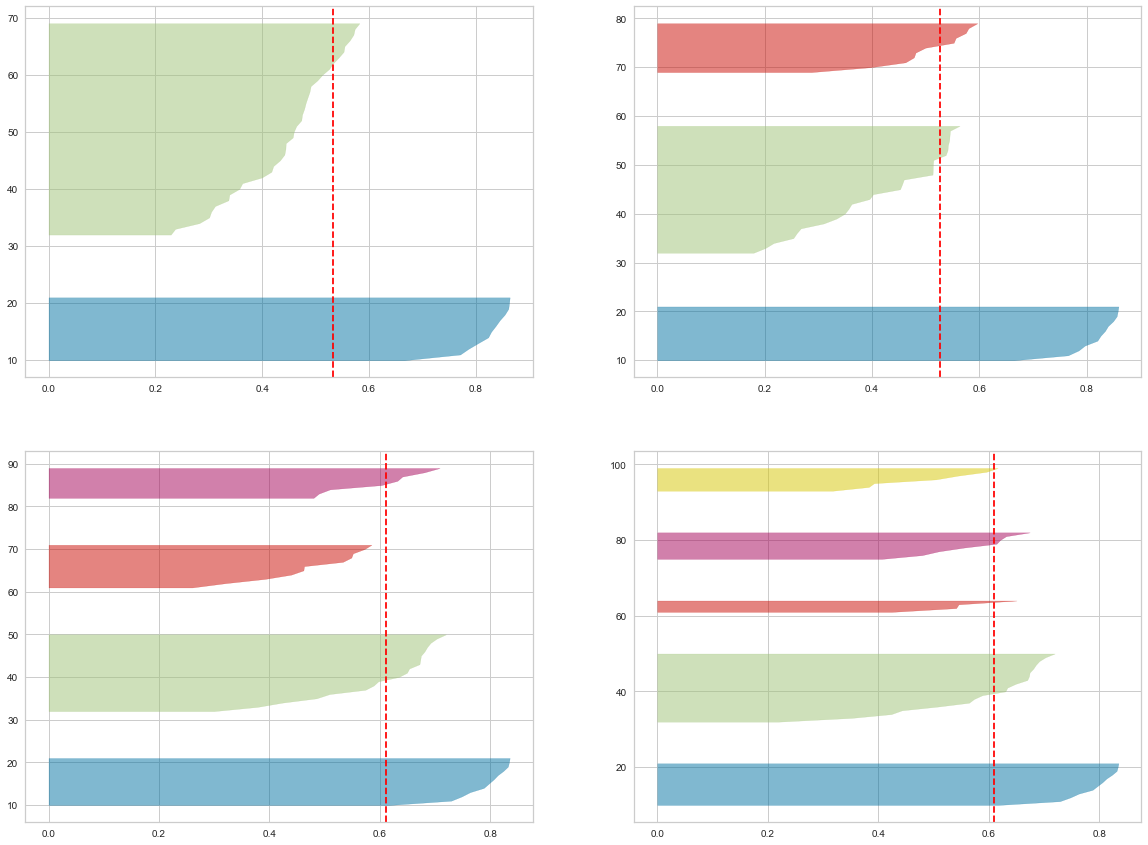

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(20,15))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df1) 

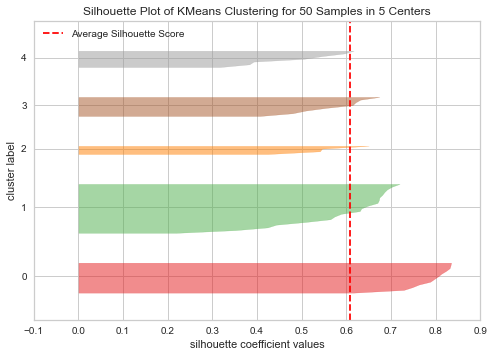

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
model_clust = KMeans(n_clusters = 5, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_clust)
sil_visualizer.fit(df1)    
sil_visualizer.show()

In [26]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=4, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(df1)
    sil_score1= silhouette_score(df1, cluster_labels1)
    print("For n_clusters =", 4,"The average silhouette_score is :", sil_score1)

For n_clusters = 4 The average silhouette_score is : 0.6106250327685199
For n_clusters = 4 The average silhouette_score is : 0.6106250327685199
For n_clusters = 4 The average silhouette_score is : 0.6106250327685199
For n_clusters = 4 The average silhouette_score is : 0.6106250327685199
For n_clusters = 4 The average silhouette_score is : 0.6106250327685199
For n_clusters = 4 The average silhouette_score is : 0.6106250327685199
For n_clusters = 4 The average silhouette_score is : 0.6106250327685199
For n_clusters = 4 The average silhouette_score is : 0.6106250327685199


# Run Hierarchical Clustering.(Agglomerative Clustering)

In [27]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(df1)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([0, 4, 2, 1, 4, 4, 3, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       3, 0, 1, 1, 1, 4, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 3, 0, 3, 0, 0, 1,
       3, 1, 1, 3, 3, 1], dtype=int64)

In [28]:
# Cluster numbers

agg_clustering.n_clusters_

5

In [29]:
# Clustering Score

(silhouette_score(df1, agg_clustering.labels_)*100).round(3)

60.933

In [30]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(df1)
        silhouette_score1 = silhouette_score(df1, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5323971520882411
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.5323971520882411
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5323971520882411
For n_clusters = 2 The average silhouette_score with linkage- single : 0.5323971520882411

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5269450262518088
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5269450262518088
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5269450262518088
For n_clusters = 3 The average silhouette_score with linkage- single : 0.4748253920463299

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.6106250327685199
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6106250327685199
For n_clusters = 4 The average silhouette_score with linkage- average : 0.6106250327685199
For n

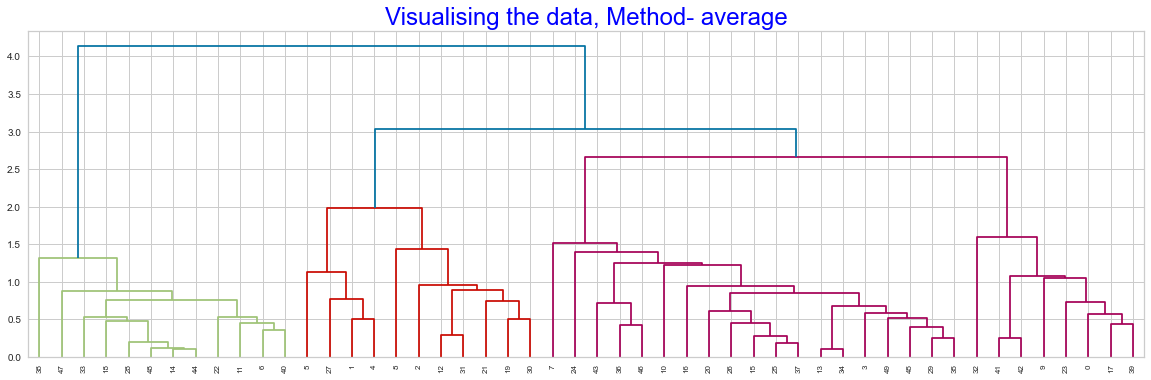

In [31]:
import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(df1, method = methods,optimal_ordering=False))

#  Putting Cluster lables into original dataset And analysis of the same

In [32]:
hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [33]:
df3 = pd.concat([df.copy(),hie_cluster], axis=1)
df3 .head()

,city name,Murder,Assault,Rape,Hie_Clustering
0,Alabama,13.2,236,21.2,0
1,Alaska,10.0,263,44.5,4
2,Arizona,8.1,294,31.0,2
3,Arkansas,8.8,190,19.5,1
4,California,9.0,276,40.6,4


<AxesSubplot:>

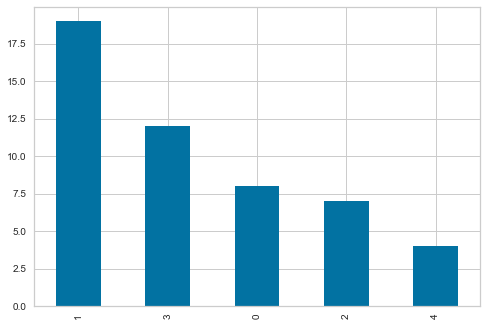

In [34]:
df3['Hie_Clustering'].value_counts().plot.bar()

In [35]:
y=pd.DataFrame(clusters_new.labels_.copy(), columns=['Kmeans'])
df4 = pd.concat([df.copy(),y], axis=1)
df4 .head()


,city name,Murder,Assault,Rape,Kmeans
0,Alabama,13.2,236,21.2,4
1,Alaska,10.0,263,44.5,1
2,Arizona,8.1,294,31.0,2
3,Arkansas,8.8,190,19.5,3
4,California,9.0,276,40.6,1


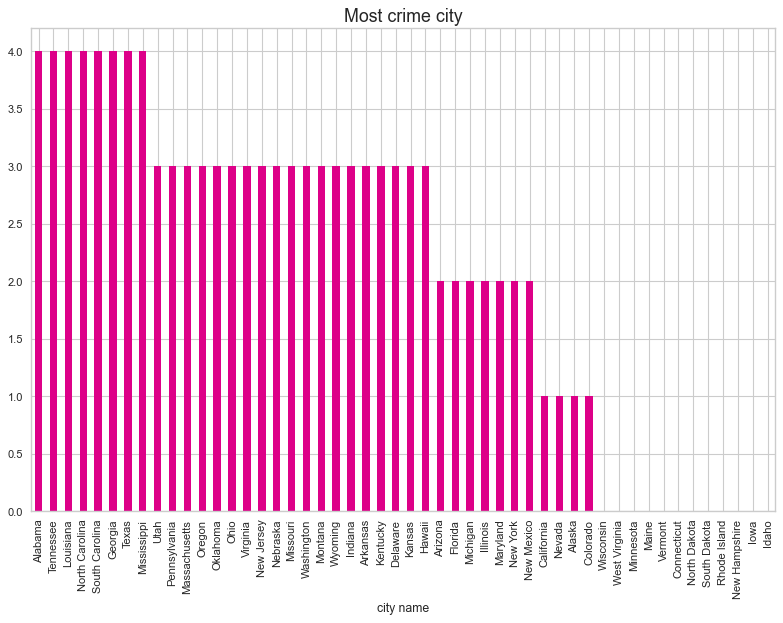

In [36]:
crime=df4.groupby("city name")["Kmeans"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
crime.plot.bar(color="#dd0088")
plt.title("Most crime city",fontsize=16)
plt.show()

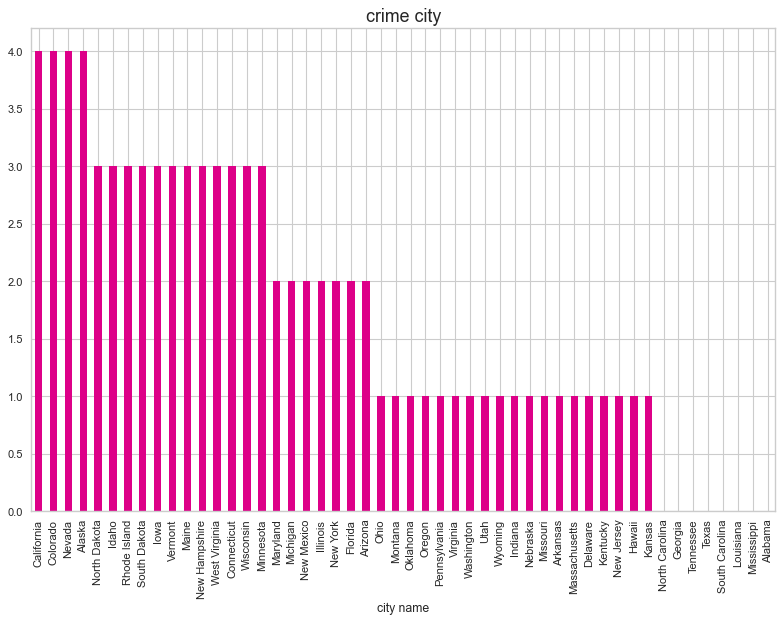

In [37]:
crime=df3.groupby("city name")["Hie_Clustering"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
crime.plot.bar(color="#dd0088")
plt.title("crime city",fontsize=16)
plt.show()

# PCA 

In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_df=pca.fit_transform(df1)
df5 = pd.DataFrame(data=pca_df, columns = ['components1','components2','components3','components4'])
df5

,components1,components2,components3,components4
0,-2.198523,-0.776346,0.463414,0.097267
1,-0.878911,2.753978,-0.865711,0.060993
2,-0.974704,1.326889,-0.056427,-0.807619
3,-0.720832,-0.570983,0.139394,-0.137536
4,-0.686125,2.547411,-0.587504,-0.252531
5,-0.100406,2.028675,-0.934037,0.116911
6,2.635272,0.407605,0.535926,-0.038343
7,-0.504147,-0.654697,0.392681,-1.049675
8,-2.072508,1.844930,0.844111,0.107982
9,-2.722979,-0.475865,0.395277,1.054767


In [39]:
df5['Kmeans'] = clusters_new.labels_

In [40]:
df5.head()

,components1,components2,components3,components4,Kmeans
0,-2.198523,-0.776346,0.463414,0.097267,4
1,-0.878911,2.753978,-0.865711,0.060993,1
2,-0.974704,1.326889,-0.056427,-0.807619,2
3,-0.720832,-0.570983,0.139394,-0.137536,3
4,-0.686125,2.547411,-0.587504,-0.252531,1


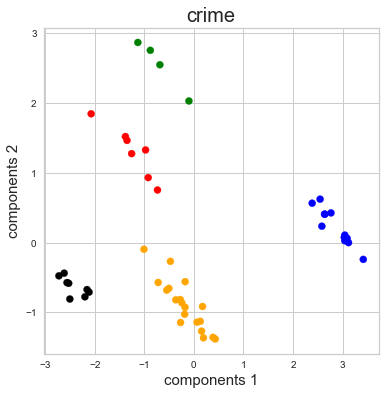

In [41]:
fig =plt.figure(figsize =(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('components 1',fontsize=15)
ax.set_ylabel('components 2',fontsize=15)
ax.set_title('crime',fontsize=20)
color_theme =np.array(["blue","green","red","orange","black"])
ax.scatter(x=df5.components1,y=df5.components2,c=color_theme[df5.Kmeans],s=50)
plt.show()

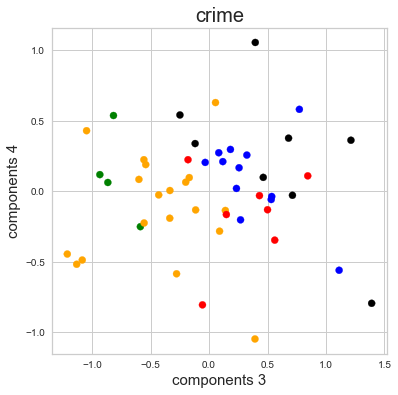

In [42]:
fig =plt.figure(figsize =(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('components 3',fontsize=15)
ax.set_ylabel('components 4',fontsize=15)
ax.set_title('crime',fontsize=20)
color_theme =np.array(["blue","green","red","orange","black"])
ax.scatter(x=df5.components3,y=df5.components4,c=color_theme[df5.Kmeans],s=50)
plt.show()

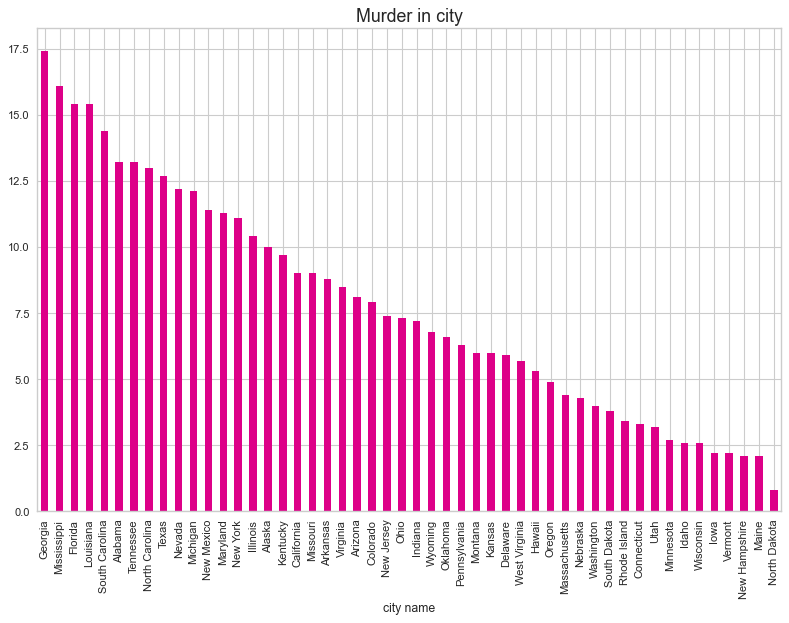

In [43]:
crime=df4.groupby("city name")["Murder"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
crime.plot.bar(color="#dd0088")
plt.title("Murder in city",fontsize=16)
plt.show()

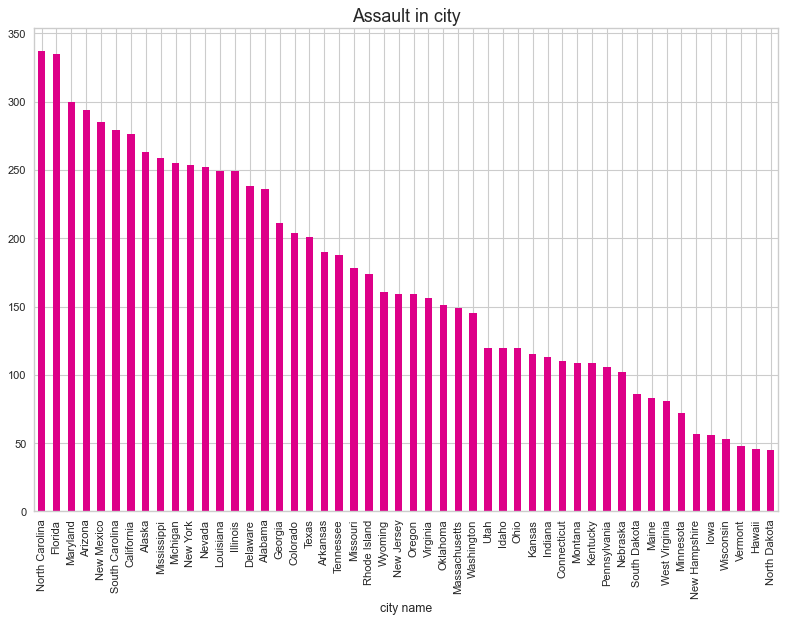

In [44]:
crime=df4.groupby("city name")["Assault"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
crime.plot.bar(color="#dd0088")
plt.title("Assault in city",fontsize=16)
plt.show()

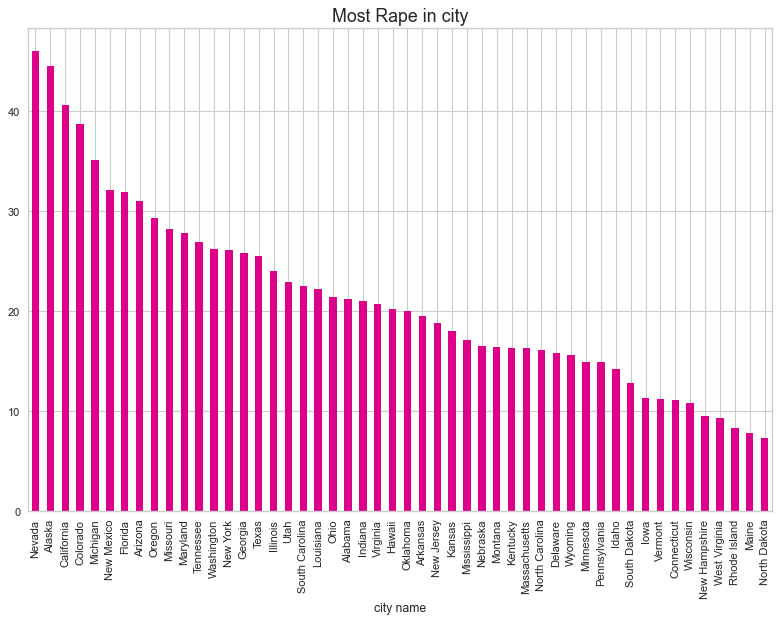

In [45]:
crime=df4.groupby("city name")["Rape"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
crime.plot.bar(color="#dd0088")
plt.title("Most Rape in city",fontsize=16)
plt.show()

In [48]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Kmeans"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

TypeError: 'dict' object is not callable